In [2]:
import pandas as pd
import numpy as np
import sklearn

In [3]:
house_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')


In [4]:
house_data.head()


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [5]:
fetaures_name = house_data.columns
target = house_data.Price

In [6]:
fetaures_name

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [7]:
# store the values in dataframe
house_data.columns = fetaures_name
house_data.Price = target

In [8]:
import seaborn as sns

<AxesSubplot:>

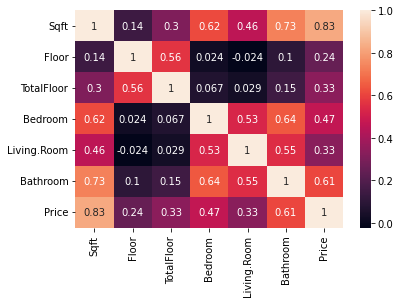

In [9]:
#corr = house_data.heatmap
corr = house_data.corr()
sns.heatmap(corr, annot = True)

In [10]:
# split X and y
X = house_data.iloc[:, :-1]
y = house_data.iloc[:, -1]

In [11]:
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Apply knn
from sklearn.neighbors import KNeighborsRegressor
nn_model = KNeighborsRegressor(n_neighbors = 2)
nn_model.fit(X_train,y_train)
y_pred = nn_model.predict(X_test)

In [14]:
print(nn_model.score(X_train,y_train))
print(nn_model.score(X_test, y_test))

0.8804654770956463
0.8153986896105112


In [15]:
#Better value for k
from sklearn.neighbors import KNeighborsRegressor
value_k = []

for k in range(2, 11):
    nn_model = KNeighborsRegressor(n_neighbors = k)
    nn_model.fit(X_train, y_train)
    y_predict = nn_model.predict(X_test)
    value_k.append({k,nn_model.score(X_train,y_train),nn_model.score(X_test, y_test)})

In [16]:
value_k

[{0.8153986896105112, 0.8804654770956463, 2},
 {0.7803826085178416, 0.8167797270788794, 3},
 {0.788823538081094, 0.7907955102175765, 4},
 {0.7644674772644028, 0.769752767469208, 5},
 {0.7473008672626413, 0.7729759132665596, 6},
 {0.730803061844939, 0.7554000495897374, 7},
 {0.7225687206897415, 0.7546538795426457, 8},
 {0.7092717078396775, 0.7390309932840684, 9},
 {0.7061461495354532, 0.734823061954424, 10}]